DATA PROCESSING


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
df_train.info()
df_train.head()
df_train.isnull().sum()
df_train.duplicated().sum()
df_train.drop(columns = ['id','Unnamed: 32'], axis = 1, inplace = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


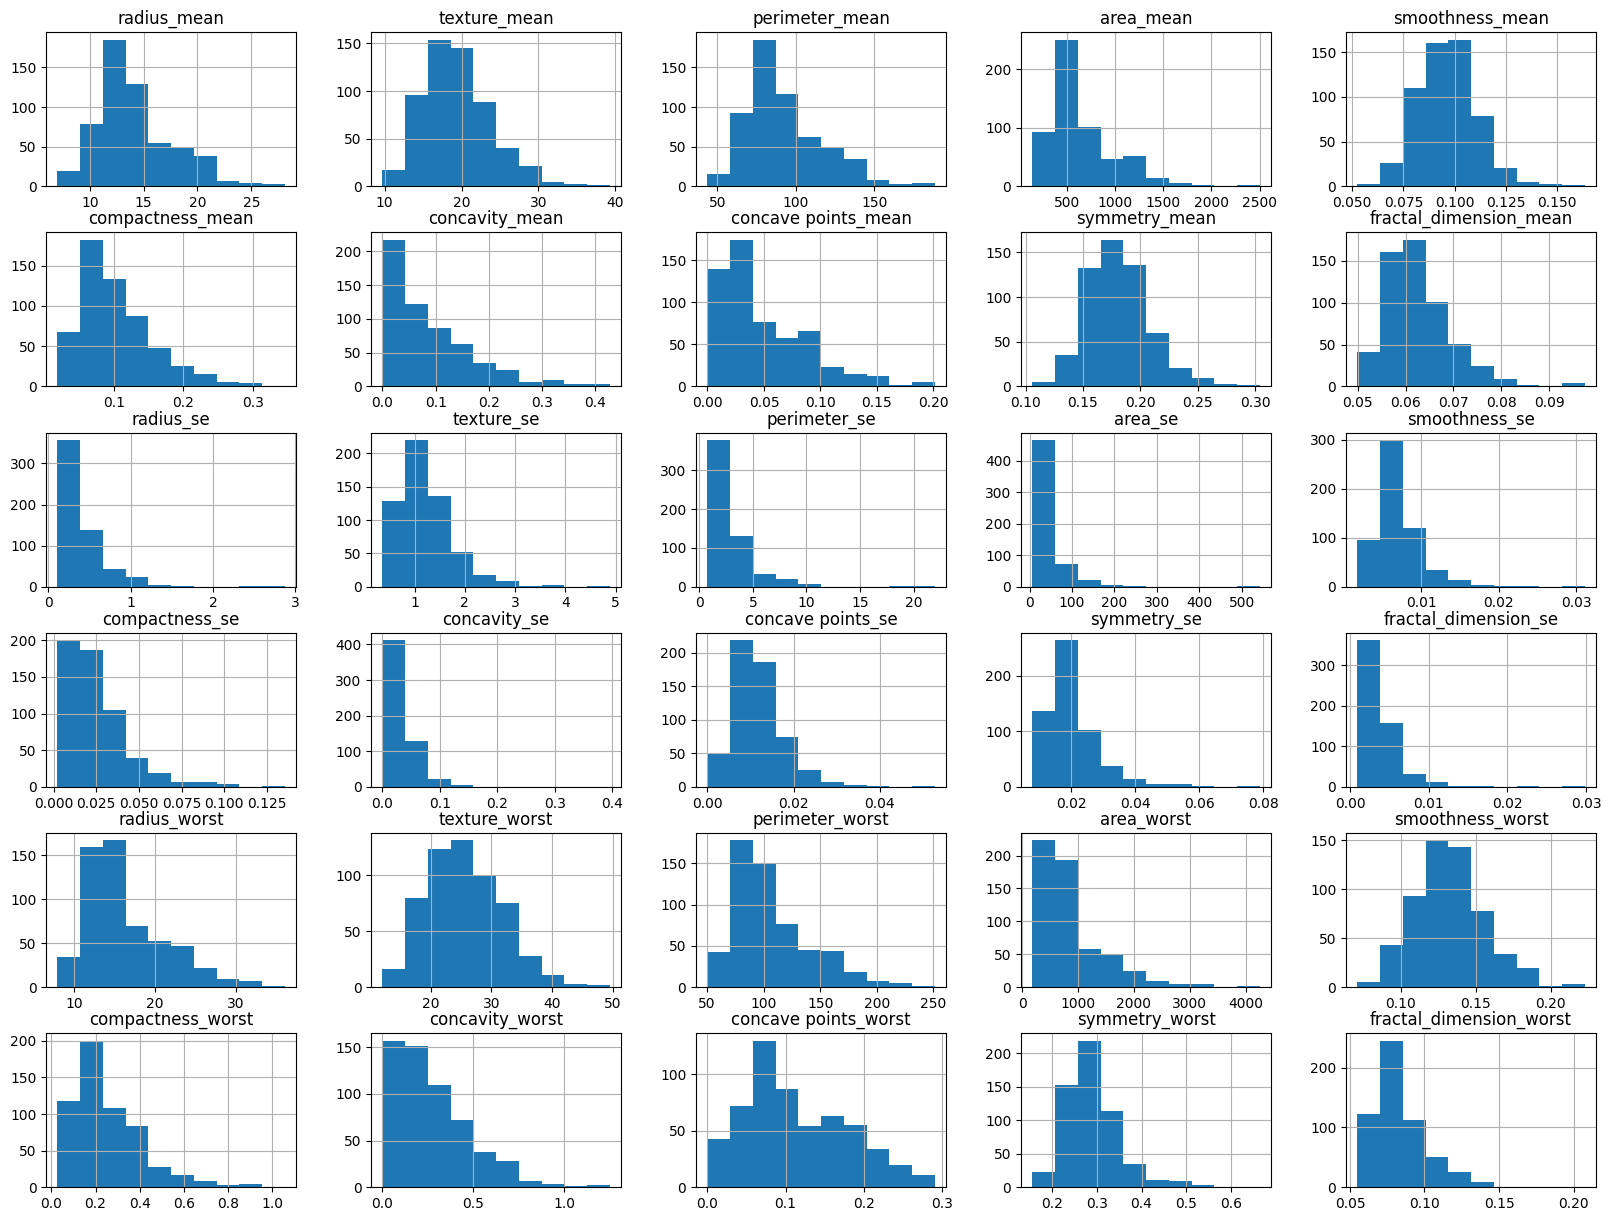

In [ ]:
df_train.hist(figsize = (20, 15))
plt.show()


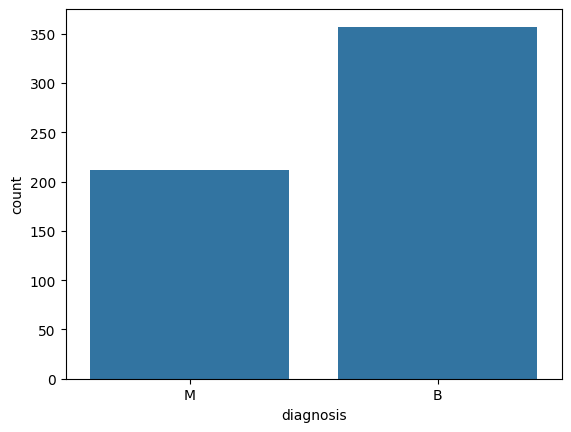

In [ ]:
sns.countplot(x='diagnosis', data=df_train);

In [ ]:
# Convert 'diagnosis' column to numerical representation (e.g., 0 and 1)
df_train['diagnosis_numeric'] = pd.factorize(df_train['diagnosis'])[0]

# Calculate the proportion
proportion_Malignant = df_train['diagnosis'].value_counts(normalize=True)['M']
proportion_Benign = df_train['diagnosis'].value_counts(normalize=True)['B']

In [ ]:
# Print the proportions
print("Proportion of Malignant:", proportion_Malignant)
print("Proportion of Benign:", proportion_Benign)

Proportion of Malignant: 0.37258347978910367
Proportion of Benign: 0.6274165202108963


In [ ]:
from imblearn.over_sampling import SMOTE
# Separate features (X) and target (y)
X = df_train.drop(['diagnosis', 'diagnosis_numeric'], axis=1)
y = df_train['diagnosis_numeric']
# Apply SMOTE
smote = SMOTE(random_state=42)  # You can adjust the random_state
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:

# Create a new balanced DataFrame
df_train_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_train_balanced['diagnosis_numeric'] = y_resampled
# Calculate the proportion
proportion_Malignant = df_train_balanced['diagnosis_numeric'].value_counts(normalize=True)[1]
proportion_Benign = df_train_balanced['diagnosis_numeric'].value_counts(normalize=True)[0]

# Print the proportions
print("Proportion of Malignant:", proportion_Malignant)
print("Proportion of Benign:", proportion_Benign)

Proportion of Malignant: 0.5
Proportion of Benign: 0.5


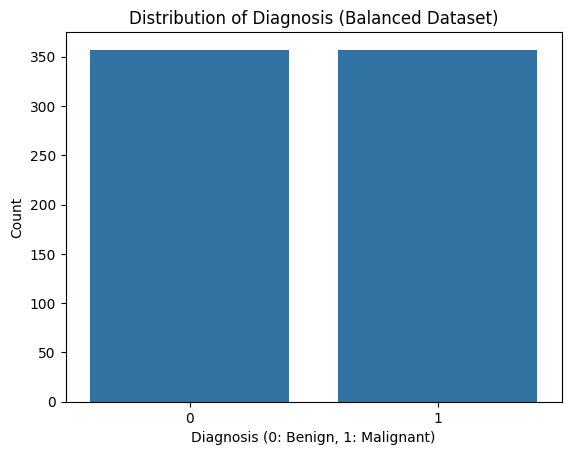

In [ ]:
sns.countplot(x='diagnosis_numeric', data=df_train_balanced)
plt.title('Distribution of Diagnosis (Balanced Dataset)')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Display the columns of X_resampled to identify any extra columns
print("Columns in X_resampled:", X_resampled.columns)

# If 'diagnosis_numeric' is present in X_resampled, drop it
if 'diagnosis_numeric' in X_resampled.columns:
    X_resampled = X_resampled.drop(columns=['diagnosis_numeric'])
# Step 3: Re-run the scaling process after ensuring only the intended features are present
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X_resampled)

# Convert scaled features back to DataFrame and add 'diagnosis_numeric' as target
df_train_scaled = pd.DataFrame(scaled_features, columns=X_resampled.columns)
df_train_scaled['diagnosis_numeric'] = y_resampled

print("Final DataFrame Shape:", df_train_scaled.shape)


Columns in X_resampled: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Final DataFrame Shape: (714, 31)


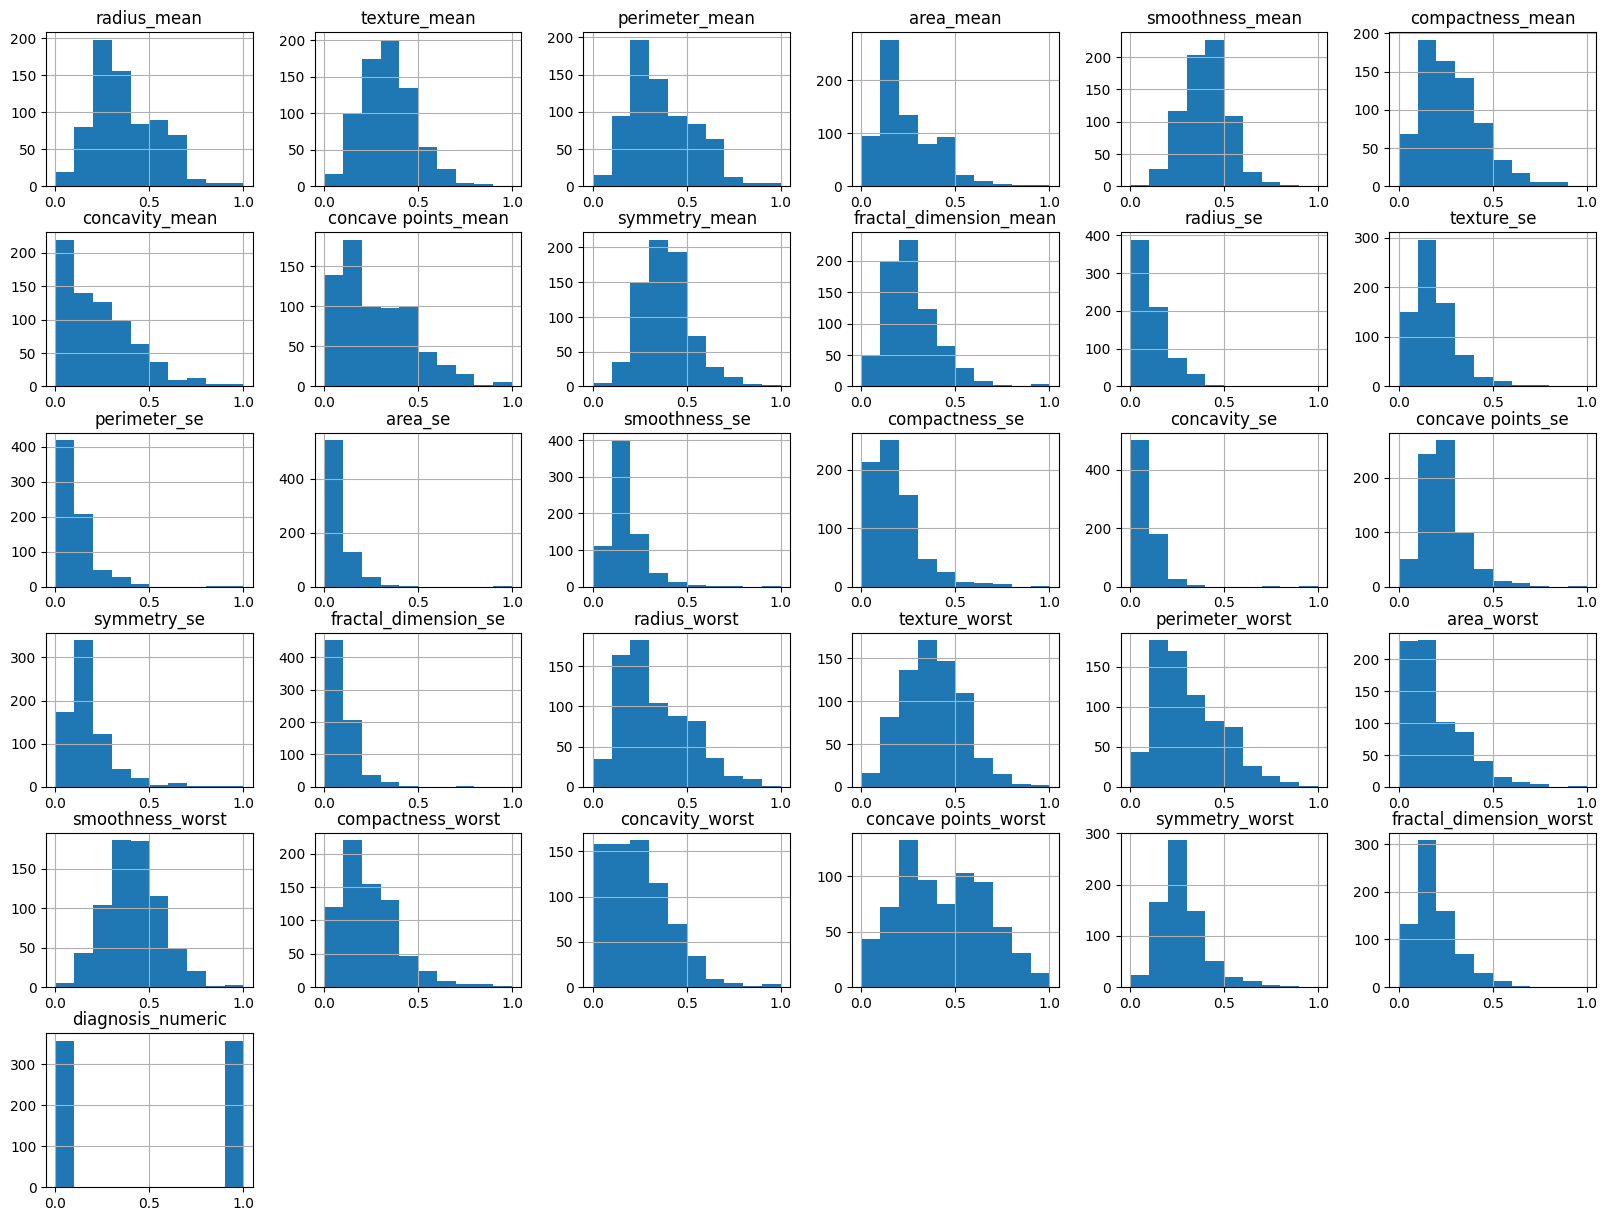

In [ ]:
df_train_scaled.hist(figsize = (20, 15))
plt.show()

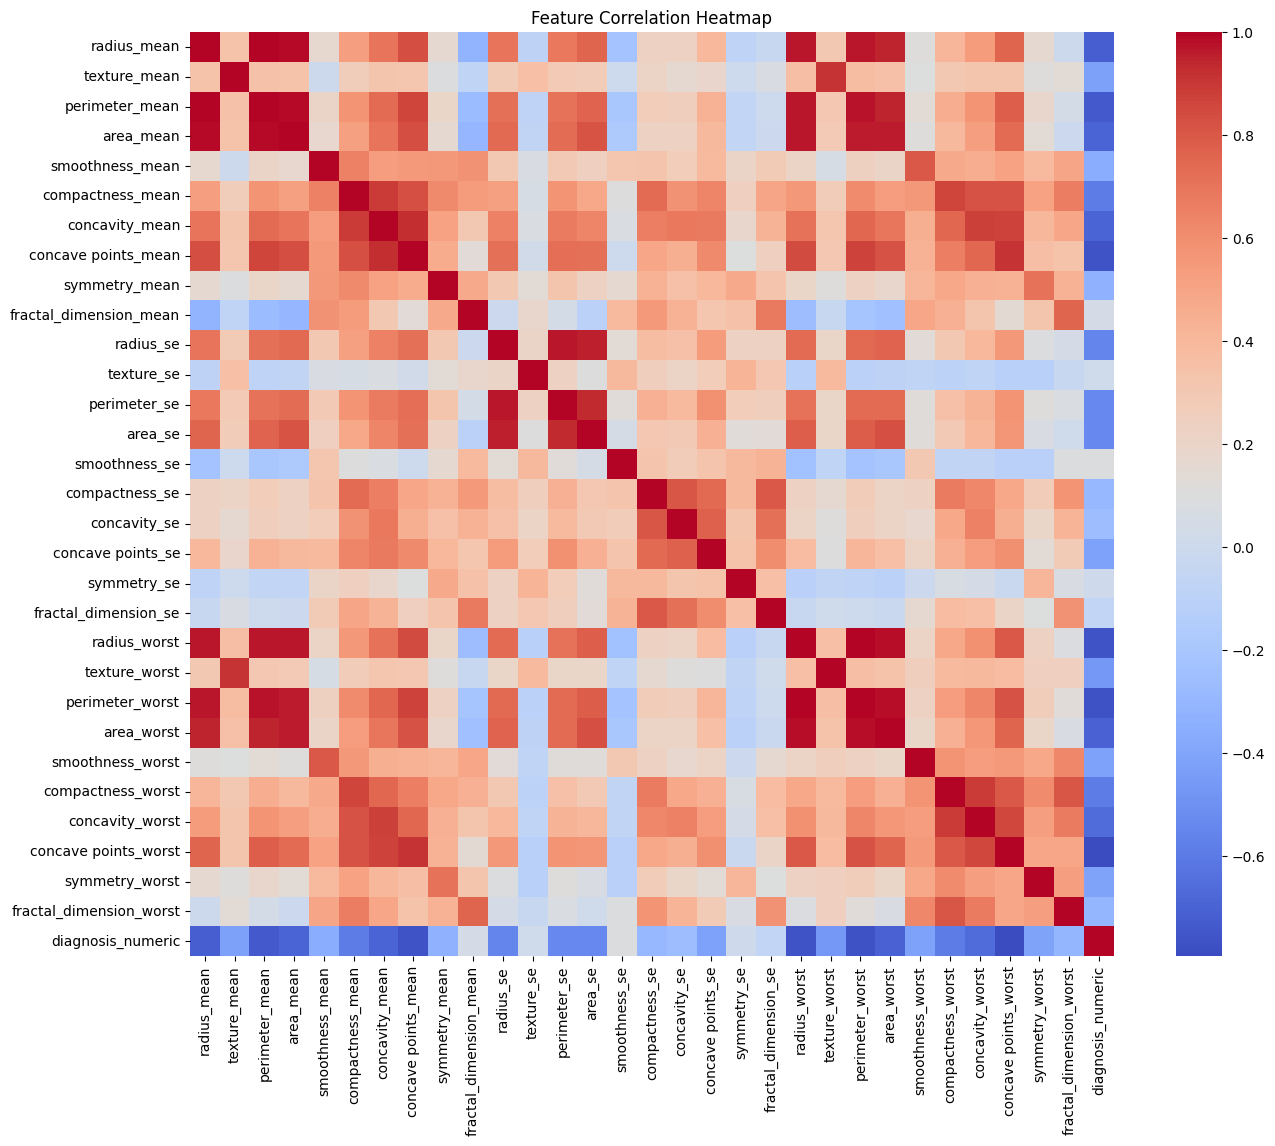

In [ ]:
plt.figure(figsize=(16, 12))
correlation_matrix = df_train_scaled.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Define threshold for filtering relevant features
threshold = 0.4

# Get the correlation of each feature with 'diagnosis_numeric' and filter based on threshold
correlation_with_target = correlation_matrix['diagnosis_numeric'].abs()
relevant_features = correlation_with_target[correlation_with_target > threshold].index

# Create a DataFrame with only relevant features
df_relevant = df_train_scaled[relevant_features]
# List of all columns before filtering
all_columns = set(df_train_scaled.columns)

# List of columns retained based on correlation threshold
retained_columns = set(df_relevant.columns)

# Columns that were dropped
dropped_columns = all_columns - retained_columns

print("Retained Columns (Significantly Correlated):")
print(retained_columns)

print("\nDropped Columns (Low Correlation with Target):")
print(dropped_columns)


Retained Columns (Significantly Correlated):
{'compactness_mean', 'texture_mean', 'radius_worst', 'perimeter_worst', 'area_se', 'perimeter_se', 'texture_worst', 'symmetry_worst', 'radius_se', 'concavity_worst', 'area_worst', 'concave points_se', 'smoothness_worst', 'area_mean', 'diagnosis_numeric', 'concavity_mean', 'perimeter_mean', 'compactness_worst', 'concave points_mean', 'radius_mean', 'concave points_worst'}

Dropped Columns (Low Correlation with Target):
{'symmetry_se', 'smoothness_mean', 'fractal_dimension_se', 'compactness_se', 'fractal_dimension_worst', 'smoothness_se', 'fractal_dimension_mean', 'symmetry_mean', 'texture_se', 'concavity_se'}


LOADING AND SPLITTING THE DATASET

In [ ]:
X= df_relevant.drop( 'diagnosis_numeric', axis=1) # Features
y = df_relevant['diagnosis_numeric'] # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DECISION TREE

In [ ]:
# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Decision Tree model
best_model = grid_search.best_estimator_

# Predictions on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.00
Testing Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        74
           1       0.97      0.94      0.96        69

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



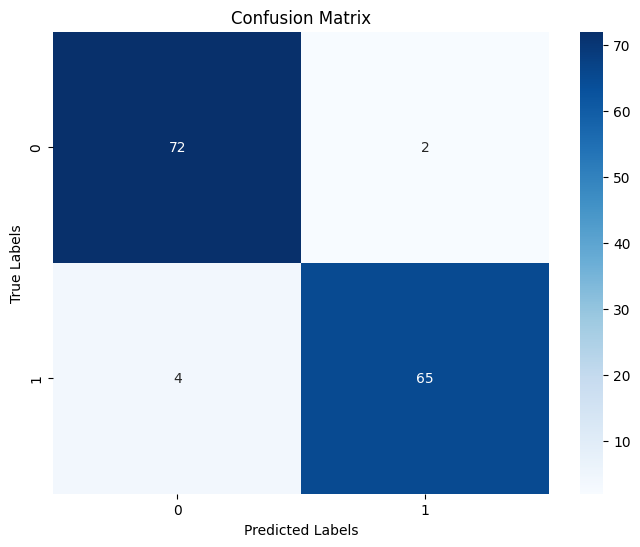

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


<ipython-input-105-807e7be5c930>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')


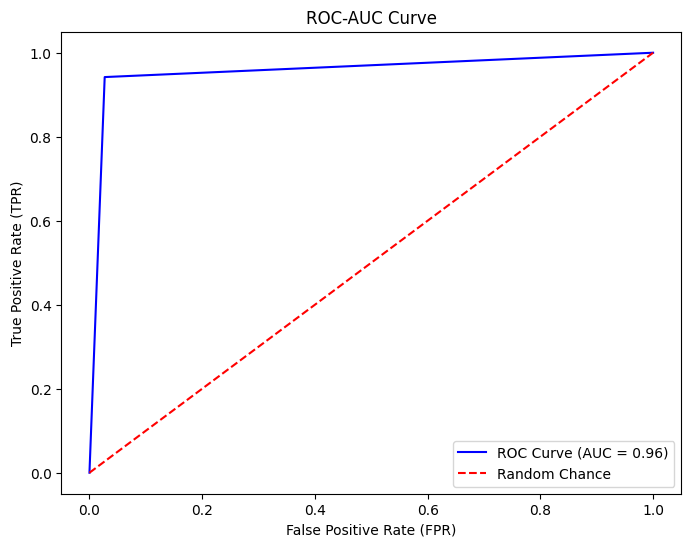

In [ ]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

LOGISTIC REGRESSION

In [ ]:
# Parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform Grid Search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best Logistic Regression model
best_model = grid_search.best_estimator_

# Predictions on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training Accuracy: 0.98
Testing Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.99      0.97      0.98        69

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



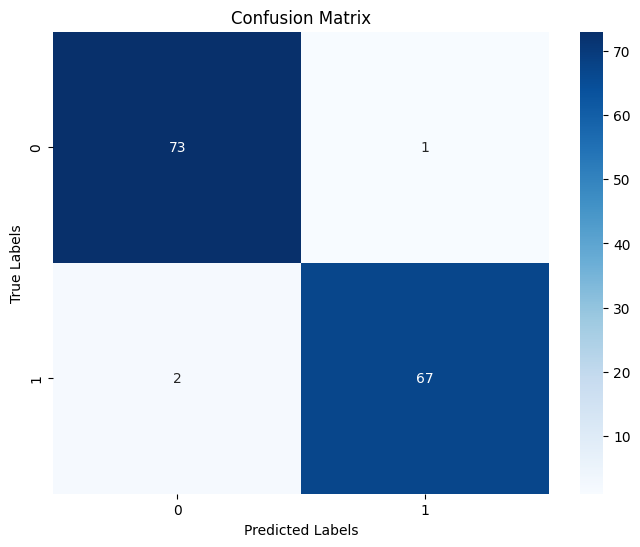

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<ipython-input-108-807e7be5c930>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')


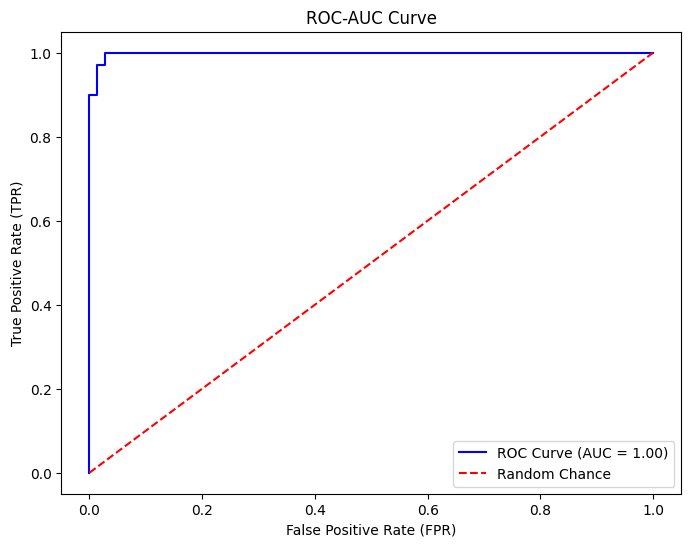

In [ ]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()


RANDOM FOREST

In [ ]:
#  GridSearchCV to find best parameter
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],      # Maximum tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples for a split
    'max_features': ['sqrt', 'log2']  # Number of features to consider
}

# Initialize base RandomForestClassifier
base_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
base_classifier.fit(X_train, y_train)  # Train the base model

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=base_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predictions on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 1.00
Testing Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       0.99      0.99      0.99        69

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



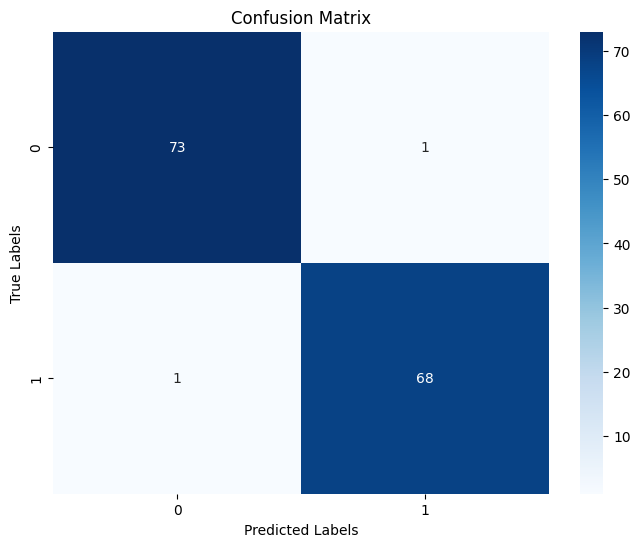

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


<ipython-input-111-506dcb4d44ea>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')


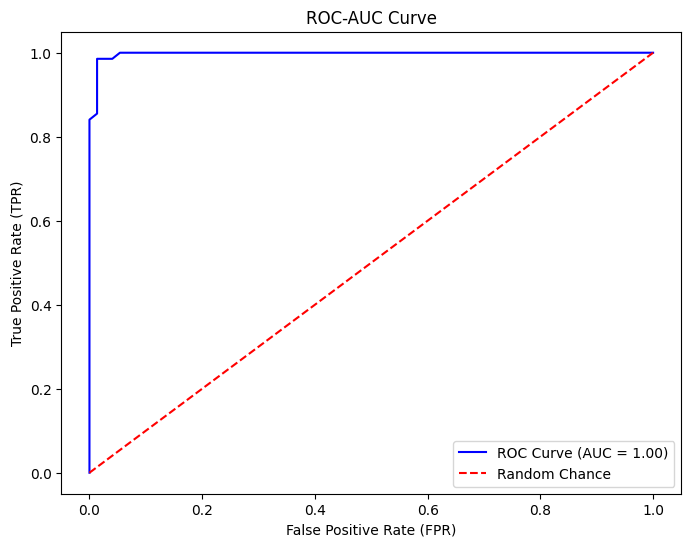

In [ ]:
# ROC-AUC Curve
y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

SVM


In [ ]:

# Grid search to find best parameter
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
}

# GridSearchCV for SVM
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and cross-validation accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_

# Predictions on training and testing data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate probabilities for ROC-AUC curve
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display accuracies
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.9789931350114417
Training Accuracy: 0.99
Testing Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.99      1.00      0.99        69

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



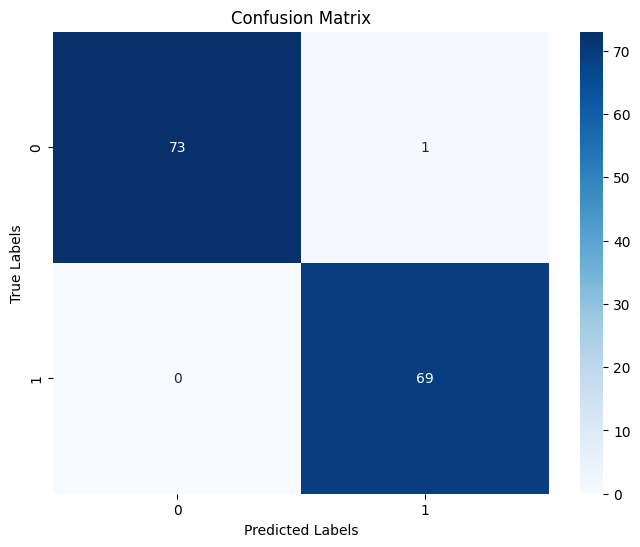

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<ipython-input-114-38a34a4f8a99>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')


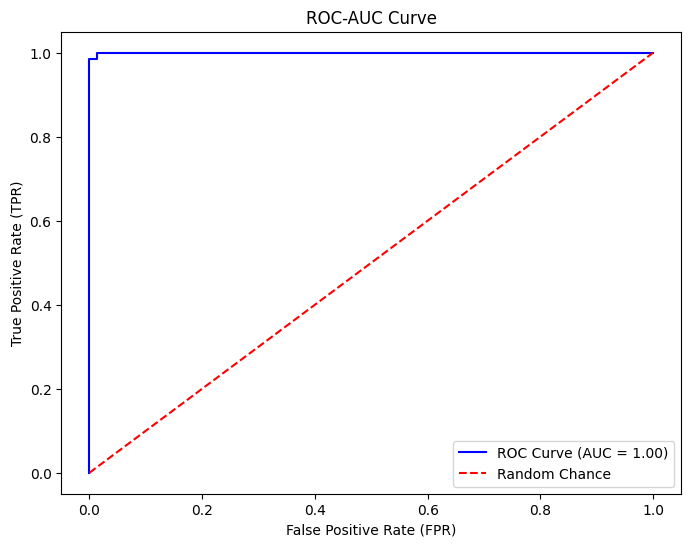

In [ ]:
# ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC-AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='red')
plt.title('ROC-AUC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()